<a href="https://colab.research.google.com/github/youngbinwoo/Principle_Component_Analysis/blob/master/PCA%20in%20python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Principle Component Analysis (PCA) in Python

### Introduction
- Difficult to Comprehend, Compute, Visualize, Analyze, etc.
- Reduce the dimensionality of a data set consisting of a large number of
interrelated variables.
- Retain as much as possible of the variation present in the data set.
- Transform to a new set of variables, the principal components, which are
uncorrelated, and which are ordered so that the first few retain most of the
variation present in all of the original variables.
- How to compute : Eigendecomposition or Singular Value Decomposition
- Identify some linear trends and simple patterns in a group of samples.

#### Data load

##### Data link : http://yatani.jp/teaching/doku.php?id=hcistats:PCA

In [3]:
import pandas as pd
import numpy as np

df = pd.read_excel('pcaex.xlsx')
df.head()

,Participant,Price,Software,Aesthetics,Brand
0,P1,6,5,3,4
1,P2,7,3,2,2
2,P3,6,4,4,5
3,P4,5,7,1,3
4,P5,7,7,5,5


In [4]:
data = df.values; print('data size is ',data.shape); data = data[:,1:]
x = np.zeros([1,len(data[0,:])])
for i in range(0,len(data[0,:])):
    x[:,i] = np.mean(data[:,i])
    
I = np.ones(data.shape); print('size of I is ',I.shape)
mean_matrix = I*x; print('mean_matrix size is ',mean_matrix.shape)
print('the mean of the columns of data is ',x)

X = data - mean_matrix; print('\nWe obtain the mean centered data matrix as follows:\n\n',X)
print('\nand size of it is ',X.shape)
print('\nThe sum of all of the components of X : ',np.sum(X),'\n it means that this data is "well-mean centered"')

data size is  (16, 5)
size of I is  (16, 4)
mean_matrix size is  (16, 4)
the mean of the columns of data is  [[4.1875 5.0625 4.5    4.6875]]

We obtain the mean centered data matrix as follows:

 [[1.8125 -0.0625 -1.5 -0.6875]
 [2.8125 -2.0625 -2.5 -2.6875]
 [1.8125 -1.0625 -0.5 0.3125]
 [0.8125 1.9375 -3.5 -1.6875]
 [2.8125 1.9375 0.5 0.3125]
 [1.8125 -1.0625 -2.5 -1.6875]
 [0.8125 1.9375 -2.5 -3.6875]
 [1.8125 -0.0625 -0.5 -0.6875]
 [-1.1875 -0.0625 1.5 2.3125]
 [-3.1875 -2.0625 2.5 0.3125]
 [-2.1875 0.9375 1.5 2.3125]
 [0.8125 1.9375 2.5 1.3125]
 [-2.1875 -1.0625 0.5 1.3125]
 [-1.1875 -0.0625 1.5 0.3125]
 [-3.1875 0.9375 0.5 0.3125]
 [-2.1875 -2.0625 2.5 2.3125]]

and size of it is  (16, 4)

The sum of all of the components of X :  0.0 
 it means that this data is "well-mean centered"


#### Note that :
Look for a few $(p<n)$ derived variables that preserve most of the information
given by these variances and covariances (or correlations).

#### (Additional) : calculate covariance matrix of $X$ for Eigendecomposition
#### <center>$\sum = \frac 1{n-1}X^T X $</center>

Now the data type of X is  object
The modified dtype of X is  float64

## Singular Value Decomposition ##

U_size =  (16, 16) , S_size =  (4,) , V_size =  (4, 4)
--------------------------------------------------------
Standard Deviation of PCs no.1 : [3.05353618]
Standard Deviation of PCs no.2 : [1.48718027]
Standard Deviation of PCs no.3 : [1.36845699]
Standard Deviation of PCs no.4 : [0.71580055]
Variance of PCs % no.1 : [0.66979347]%
Variance of PCs % no.2 : [0.15887735]%
Variance of PCs % no.3 : [0.13452316]%
Variance of PCs % no.4 : [0.03680602]%


Sum of all variances :  1.0


## finding "p" satisfying Sp >= 80 ##
------------------------------------------------------------------------------------------
find "p" as the number of column number reducing dimension : column no.1 = [0.]%
find "p" as the number of column number reducing dimension : column no.2 = [0.66979347]%
find "p" as the number of column number reducing dimension : column no.3 = [0.82867082]%
find "p" as the numbe

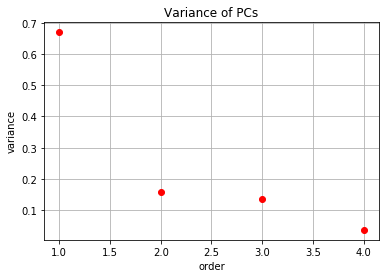

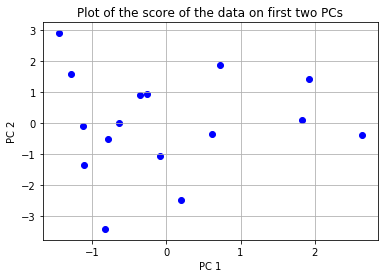

In [7]:
print('Now the data type of X is ',X.dtype)
X = X.astype(np.float64); print('The modified dtype of X is ',X.dtype)

# Singular Vector Decomposition
U,S,V = np.linalg.svd(X)

print('\n## Singular Value Decomposition ##\n')
print('U_size = ',U.shape,', S_size = ',S.shape,', V_size = ',V.shape)
print('--------------------------------------------------------')

variance_ev = np.zeros([1,len(S)])
for i in range(len(S)):
    variance_ev[:,i] = S[i]**2/(len(X[:,0])-1)
    print('Standard Deviation of PCs no.{} : {}'.format(i+1,np.sqrt(variance_ev[:,i])))
    
s = variance_ev/np.sum(variance_ev)

for i in range(0,len(S)):
    print('Variance of PCs % no.{} : {}%'.format(i+1,s[:,i]))

print('\n')
print('Sum of all variances : ',np.sum(s))
print('\n')

print('## finding "p" satisfying Sp >= 80 ##')
print('------------------------------------------------------------------------------------------')
Sp = np.zeros([1,len(S)])
for i in range(0,len(S)):
    Sp[:,i] = np.sum(S[:i]**2)/np.sum(S**2)
    print('find "p" as the number of column number reducing dimension : column no.{} = {}%'.format(i+1,Sp[:,i]))

PC1 = V[:,:3]; Z = X@PC1
print('\n')
print('Dimension reduced data is \n\n',Z, '\n\nand the size of it is ',Z.shape)

import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([[1,2,3,4]],s,'r-o');plt.grid();
plt.title('Variance of PCs');
plt.xlabel('order'); plt.ylabel('variance');

plt.figure(2)
plt.scatter(Z[:,0],Z[:,1],color = 'b');plt.grid();
plt.title('Plot of the score of the data on first two PCs');
plt.xlabel('PC 1'); plt.ylabel('PC 2');